In [1]:
from plot_publication import *
import numpy as np
import os

path_figure_dir = "figures"

# Create a single figure

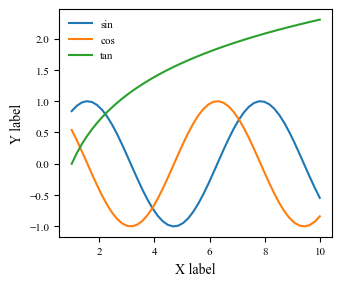

In [2]:
x = np.linspace(1, 10, 50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.log(x)

Fig = FigurePublication(1, 1)
fig, ax = Fig.fig, Fig.ax
ax.plot(x, y1, label='sin')
ax.plot(x, y2, label='cos')
ax.plot(x, y3, label='tan')
legend(ax)
ax.set_xlabel("X label")
ax.set_ylabel('Y label')
fig.tight_layout() # ! necessary command
Fig.save(os.path.join("figures", "1x1.png"))
# Fig.save(os.path.join("figures", "1x1.svg")) # Vector graphics

# Create two figures

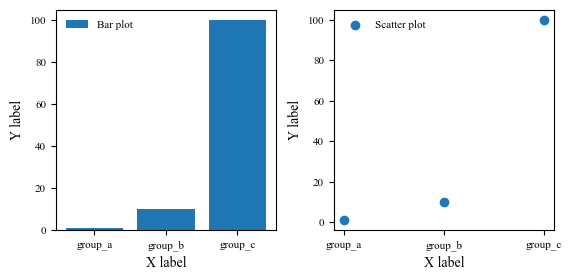

In [3]:
Fig = FigurePublication(1, 2)
fig, axes = Fig.fig, Fig.ax

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

ax = axes[0]
ax.cla()  # clear the current Axes state without closing it.
ax.bar(names, values, label='Bar plot')
legend(ax)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")

ax = axes[1]
ax.cla()  # clear the current Axes state without closing it.
ax.scatter(names, values, label="Scatter plot")
legend(ax)
ax.set_xlabel('X label')
ax.set_ylabel('Y label')

fig.tight_layout()
Fig.save(os.path.join("figures", "1x2.png"))

## Share common y axis

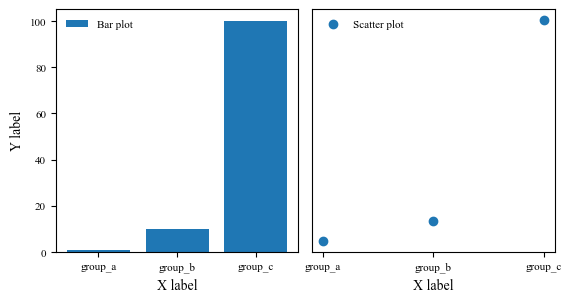

In [4]:
axes[1].get_yaxis().set_visible(False)
# fig.tight_layout()
fig.tight_layout(w_pad=0.5)  # make two sub-figures closer
Fig.save(os.path.join("figures", "1x2_tight.png"))
fig

# Create 3 x 2 figures

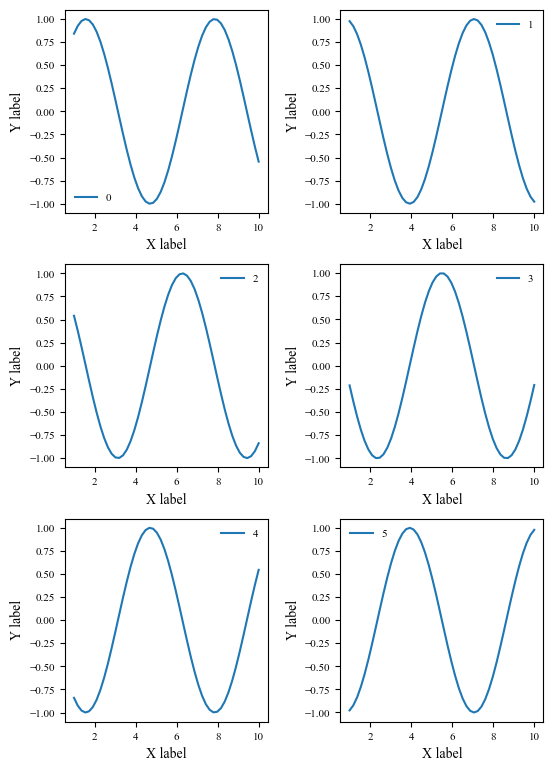

In [5]:
Fig = FigurePublication(3, 2)
fig, axes = Fig.fig, Fig.ax

x = np.linspace(1, 10, 50)

for i, ax in enumerate(Fig.ax.flatten()):
    ax.cla()  # clear the current Axes state without closing it.
    y = np.sin(x + np.pi / 4 * i)
    ax.plot(x, y, label=i)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    legend(ax)

# ! use this to select the best figure size
Fig.stretch_figure_height(0.8)  

fig.tight_layout()
# fig.tight_layout(w_pad=6)
Fig.save(os.path.join("figures", "3x2.png"))

# Create 3 x 3 figures

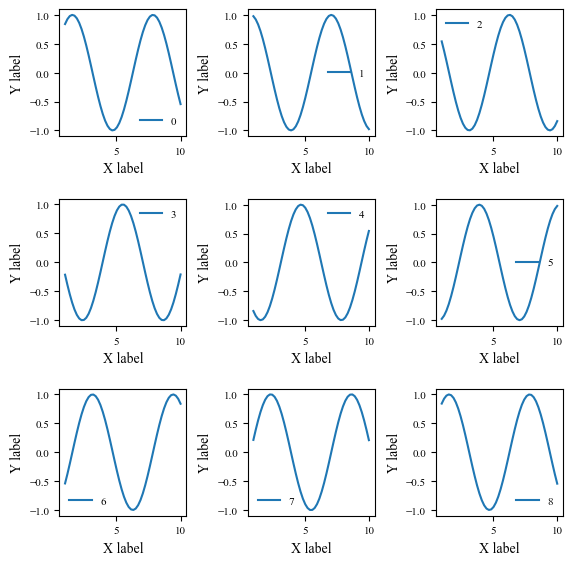

In [6]:
Fig = FigurePublication(3, 3)
fig, axes = Fig.fig, Fig.ax

x = np.linspace(1, 10, 50)

for i, ax in enumerate(Fig.ax.flatten()):
    ax.cla()  # clear the current Axes state without closing it.
    y = np.sin(x + np.pi / 4 * i)
    ax.plot(x, y, label=i)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    legend(ax)

for ax in Fig.ax.flatten():  # convert to 1d array
    ax.set_box_aspect(1.0)
Fig.stretch_figure_height(0.6) # * use this to select the best figure size
# fig.subplots_adjust(wspace=1.0)
# fig.subplots_adjust(hspace=0)


fig.tight_layout()
# fig.tight_layout(w_pad=6)
Fig.save(os.path.join("figures", "3x3.png"))

# Create 4 x 4 figures

[5.77 9.69]


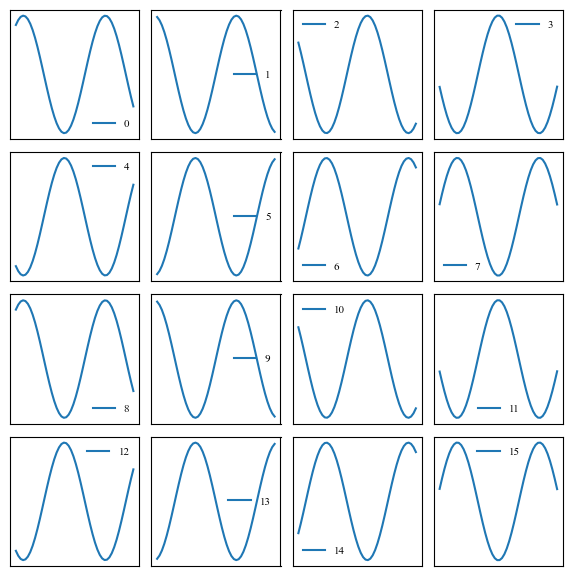

In [7]:
Fig = FigurePublication(4, 4)
fig, axes = Fig.fig, Fig.ax

print(fig.get_size_inches())
x = np.linspace(1, 10, 50)

# colors = get_default_color() # default color from matplotlib

for i, ax in enumerate(Fig.ax.flatten()):
    y = np.sin(x + np.pi/4 *i)
    ax.plot(x, y, label=i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel("X label")
    ax.set_ylabel("Y label")
    legend(ax)

Fig.stretch_figure_height(0.6)  # * use this to select the best figure size
fig.tight_layout()
Fig.save("figures/4x4.png")

## Change page size

In [8]:
Fig.change_page(PageSlide(aspectRatio='4:3'))
Fig.save('figures/4-2-slide.png')
